# Week 5, Data science in Neuroscience


## Plan for today

1. Introduction to pytorch
2. Tensors
3. Training loop in pytorch
4. A first neural network
5. A convolutional network to process images

***


# Pytorch

Pytorch is a Python library that facilitates building deep learning projects

* Store data into Tensors (multidimensional arrays that are similar to NumPy arrays)
* Allows fast calculations on dedicated hardware (GPUs)
* Ability of tensors to keep track of the operations performed on them and to analytically compute derivatives
* Classes to deal with datasets
* Classes to simplify building deep neural networks

# Tensors

pytorch tensors are very similar to NumPy arrays. They have 2 main advantages

* Used to do calculations on a GPU
* Can keep track of the graph of computations that created them (used to calculate derivatives) 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Creating tensors

In [2]:
torch.ones(5)

tensor([1., 1., 1., 1., 1.])

In [3]:
torch.zeros(3,4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [4]:
a = torch.tensor([[1.0,2],[3,4]])
a

tensor([[1., 2.],
        [3., 4.]])

You can interrogate a tensor just like a NumPy array.

In [5]:
print("shape:", a.shape)
print("ndim:", a.ndim)
print("dtype:", a.dtype)

shape: torch.Size([2, 2])
ndim: 2
dtype: torch.float32


Many of the mathematical functions of NumPy have a torch equivalent.

In [6]:
b = torch.rand(24).reshape(4,6)
b

tensor([[0.5502, 0.2821, 0.4124, 0.3132, 0.5449, 0.9411],
        [0.6035, 0.0048, 0.3620, 0.4977, 0.9823, 0.1119],
        [0.7528, 0.3379, 0.4265, 0.5893, 0.3828, 0.5935],
        [0.8480, 0.2275, 0.7717, 0.0513, 0.7081, 0.4053]])

In [7]:
b.shape

torch.Size([4, 6])

In [8]:
b.mean()

tensor(0.4875)

In [9]:
b.mean(axis=0)

tensor([0.6886, 0.2131, 0.4931, 0.3629, 0.6545, 0.5129])

We can add an extra dimension with a size of 1 using unsqueeze().

In [10]:
b.shape

torch.Size([4, 6])

In [11]:
b.unsqueeze(0).shape

torch.Size([1, 4, 6])

We can do broadcasting, just like with NumPy arrays.

```
When operating on two arrays, pytorch compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
​
* they are equal, or
* one of them is 1
```


In [12]:
b.shape

torch.Size([4, 6])

In [13]:
a = torch.ones(4)
a.shape

torch.Size([4])

In [14]:
#b+a

In [15]:
A = a.unsqueeze(1)
A.shape

torch.Size([4, 1])

In [16]:
b+A

tensor([[1.5502, 1.2821, 1.4124, 1.3132, 1.5449, 1.9411],
        [1.6035, 1.0048, 1.3620, 1.4977, 1.9823, 1.1119],
        [1.7528, 1.3379, 1.4265, 1.5893, 1.3828, 1.5935],
        [1.8480, 1.2275, 1.7717, 1.0513, 1.7081, 1.4053]])

### Moving tensors to the GPU

In [17]:
torch.cuda.is_available()

True

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cuda



In [19]:
b

tensor([[0.5502, 0.2821, 0.4124, 0.3132, 0.5449, 0.9411],
        [0.6035, 0.0048, 0.3620, 0.4977, 0.9823, 0.1119],
        [0.7528, 0.3379, 0.4265, 0.5893, 0.3828, 0.5935],
        [0.8480, 0.2275, 0.7717, 0.0513, 0.7081, 0.4053]])

In [20]:
b = b.to(device)

In [21]:
b

tensor([[0.5502, 0.2821, 0.4124, 0.3132, 0.5449, 0.9411],
        [0.6035, 0.0048, 0.3620, 0.4977, 0.9823, 0.1119],
        [0.7528, 0.3379, 0.4265, 0.5893, 0.3828, 0.5935],
        [0.8480, 0.2275, 0.7717, 0.0513, 0.7081, 0.4053]], device='cuda:0')

In [22]:
b = b.to("cpu")
b

tensor([[0.5502, 0.2821, 0.4124, 0.3132, 0.5449, 0.9411],
        [0.6035, 0.0048, 0.3620, 0.4977, 0.9823, 0.1119],
        [0.7528, 0.3379, 0.4265, 0.5893, 0.3828, 0.5935],
        [0.8480, 0.2275, 0.7717, 0.0513, 0.7081, 0.4053]])

In [23]:
b = b.to("cuda")
b

tensor([[0.5502, 0.2821, 0.4124, 0.3132, 0.5449, 0.9411],
        [0.6035, 0.0048, 0.3620, 0.4977, 0.9823, 0.1119],
        [0.7528, 0.3379, 0.4265, 0.5893, 0.3828, 0.5935],
        [0.8480, 0.2275, 0.7717, 0.0513, 0.7081, 0.4053]], device='cuda:0')

## From pytorch tensors to NumPy arrays and back

You can go between tensors and NumPy arrays using `torch.from_numpy()` and `myTensor.numpy()`

In [24]:
points_pt = torch.tensor([2,3,4])
print(type(points_pt))
points_np = points_pt.numpy()
print(type(points_np))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [25]:
a = np.array([1,2,3,4])
torch.from_numpy(a)

tensor([1, 2, 3, 4])

# Training loop with pytorch

We will recreate our machine learning example of week 2 using pytorch.

We want to predict the firing rate of a neuron from the running speed of the animal.


In [26]:
fn = "../data/animal_speed.npy"

In [27]:
speed = np.load(fn)
speed = speed[0:100]

In [28]:
w = 1.25 # weight (slope)
b = 10 # bias (intercept)
np.random.seed(0)
e = np.random.normal(loc=0.0, scale=5, size = speed.shape[0]) # random numbers taken from a normal distribution

rate = speed* w + b + e # simulate the firing rate
rate = np.maximum(0, rate) # eliminate the negative firing rates

Text(0, 0.5, 'Firing rate (Hz)')

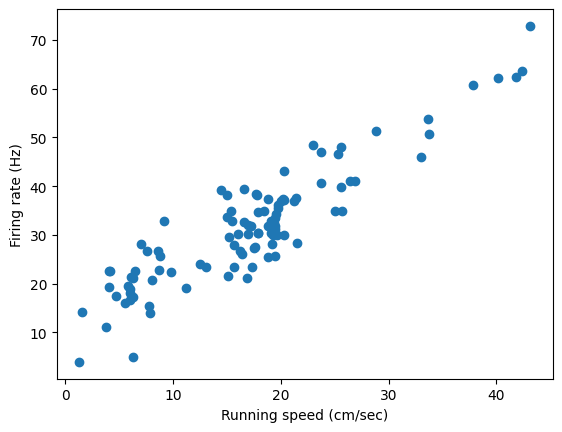

In [29]:
plt.scatter(speed,rate)
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")

### Create a model with pytorch

We will recreate our linear regression model using pytorch. 


$yhat = b+ w*X$

We will create our model by defining a class. 

There are simpler ways to create simple models in pytorch. But the way presented here is the very flexible. We can create all our models by just modifying our class.

<img src="../images/neuron_linear.png" width="500" align="center">

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [30]:
import torch.nn as nn

class Lin_model(nn.Module):
    """
    Class to create pytorch model.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.linLayer = nn.Linear(in_features=1, out_features=1, bias=True)
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.linLayer(x)
        return out

In [31]:
lin_model = Lin_model() # create model from our class definition

The parameters of the models are created automatically when creating the model.

We can use this for loop to print the parameters.

In [32]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[-0.8560]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([0.4816], requires_grad=True)


### Loss function

pytorch has built-in loss functions that we can use in our training loop. We will use the mean squared error (MSE).

In [33]:
# loss function returning MSE
loss_fn = torch.nn.MSELoss()

### pytorch optimizers

Optimizers are used to change our model parameters during learning.

There are several optimization strategies and tricks that can improve learning. 

There are more important when building deep neural networks than for linear regression models.

Let's see how to use the SGD optimizer.

In [34]:
import torch.optim as optim

In [35]:
learning_rate = 0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)

### Correct data format for our model

* X: input data
* y: labels or values that we want to predict


We need to store them in `tensors`.

The first dimension (rows) is for the observations.

We only have 1 input feature (speed), so the second dimension will have a size of 1.

In [36]:
X = torch.from_numpy(speed).unsqueeze(1).float()

In [37]:
X.shape

torch.Size([100, 1])

In [38]:
y = torch.from_numpy(rate).unsqueeze(1).float()
y.shape

torch.Size([100, 1])

### One forward pass 

We now all our needed element to train our model.

Before using our training loop, it is a good idea to run one forward pass outside of the for loop to identify potential problems.

We run all the steps that will be in our training loop.

In [39]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[-0.8560]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([0.4816], requires_grad=True)


In [40]:
yhat = lin_model(X)

In [41]:
loss = loss_fn(yhat,y)

In [42]:
optimizer.zero_grad() # zero the gradients

In [43]:
loss.backward() # calculate gradients

In [44]:
optimizer.step() # will change the model parameters to reduce the loss        

In [45]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[1.0504]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([0.5733], requires_grad=True)


### Training loop

We want a generic training loop that will work in most situations.

In [46]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, optimizer, model, X,y):
    for epoch in range (n_epochs):
        
        yhat = model(X) # make predictions
        loss = loss_fn(yhat,y) # calculate the loss
        optimizer.zero_grad() # zero the gradients of our model's parameters
        loss.backward() # calculate gradients of the model's parameters
        optimizer.step() # will change the model parameters to reduce the loss
        
        
        if epoch % 1000 ==0 or epoch < 10:
            print("Epoch: {}, Loss: {}".format(epoch,loss))
    return

In [47]:
training_loop(n_epochs = 20000,
                          optimizer = optimizer,
                          model=lin_model,
                          X = X,
                          y=y)

Epoch: 0, Loss: 200.76220703125
Epoch: 1, Loss: 56.643798828125
Epoch: 2, Loss: 47.5146598815918
Epoch: 3, Loss: 46.920013427734375
Epoch: 4, Loss: 46.86497116088867
Epoch: 5, Loss: 46.844058990478516
Epoch: 6, Loss: 46.8253173828125
Epoch: 7, Loss: 46.80672836303711
Epoch: 8, Loss: 46.78815841674805
Epoch: 9, Loss: 46.769615173339844
Epoch: 1000, Loss: 34.439876556396484
Epoch: 2000, Loss: 29.186063766479492
Epoch: 3000, Loss: 26.977375030517578
Epoch: 4000, Loss: 26.048847198486328
Epoch: 5000, Loss: 25.658489227294922
Epoch: 6000, Loss: 25.494386672973633
Epoch: 7000, Loss: 25.425397872924805
Epoch: 8000, Loss: 25.396398544311523
Epoch: 9000, Loss: 25.384201049804688
Epoch: 10000, Loss: 25.379074096679688
Epoch: 11000, Loss: 25.376924514770508
Epoch: 12000, Loss: 25.376018524169922
Epoch: 13000, Loss: 25.37563705444336
Epoch: 14000, Loss: 25.375473022460938
Epoch: 15000, Loss: 25.375408172607422
Epoch: 16000, Loss: 25.375381469726562
Epoch: 17000, Loss: 25.3753719329834
Epoch: 18000

In [48]:
for p in lin_model.parameters():
    print(p)

Parameter containing:
tensor([[1.2343]], requires_grad=True)
Parameter containing:
tensor([10.5679], requires_grad=True)


We found the parameters that were used to simulate the data.

# A first neural network

* Mathematical entities capable of representing complicated functions through a composition of simpler functions.
* Deep neural network have **multiple layers** between the input and output layers. 
* Each layer has several artificial neurons. 
* New data comes from the left, and calculations propagates towards the ouput layer.



***

* A neuron in a neural network has one more non-linear function. 

<img src="../images/artificial_neuron.png" width="500" align="center">

The non-linear function allows the model to have different slope at different values.

The non-linear function of the neuron is called the **activation function**.

Text(0.5, 1.0, 'tanh(w*x+b)')

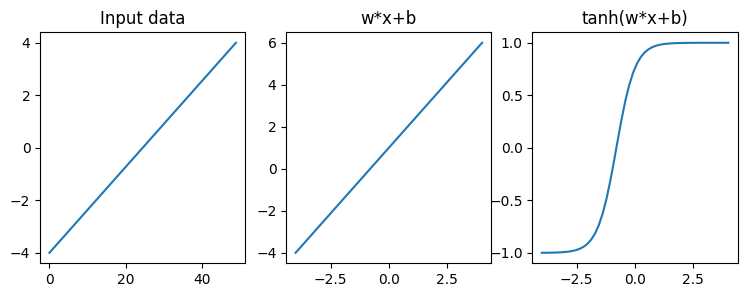

In [49]:
nrow=1
ncol=3
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3))

XX = np.linspace(-4,4) # input

ax[0].plot(XX)
ax[0].set_title("Input data")
                
w=1.25
b=1.0
                
ax[1].plot(XX,w*XX+b)
ax[1].set_title("w*x+b")

ax[2].plot(XX,np.tanh(w*XX+b))
ax[2].set_title("tanh(w*x+b)")

In neural network, we have **several artificial neurons**. 

The output of several neurons is summed to get the output.

Let's build a neural network to predict the firing rate from the speed of the animal.

In [50]:
class NN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=5, bias=True)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(in_features=5, out_features=1, bias=True)
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.layer1(x)
        out = self.tanh(out)
        out = self.layer2(out)
        return out

In [51]:
nn_model = NN_model()

In [52]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[ 0.6297],
        [-0.5480],
        [-0.0239],
        [ 0.8681],
        [-0.0201]], requires_grad=True)
layer1.bias Parameter containing:
tensor([0.1320, 0.7119, 0.7501, 0.2829, 0.9070], requires_grad=True)
layer2.weight Parameter containing:
tensor([[-0.3751, -0.2846, -0.0377, -0.0100, -0.2470]], requires_grad=True)
layer2.bias Parameter containing:
tensor([0.0888], requires_grad=True)


In [53]:
learning_rate=0.0001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)

In [54]:
training_loop(n_epochs = 30000,
              optimizer = optimizer,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 1160.6480712890625
Epoch: 1, Loss: 1151.5074462890625
Epoch: 2, Loss: 1144.1705322265625
Epoch: 3, Loss: 1139.7584228515625
Epoch: 4, Loss: 1136.55517578125
Epoch: 5, Loss: 1133.8570556640625
Epoch: 6, Loss: 1131.404296875
Epoch: 7, Loss: 1129.0853271484375
Epoch: 8, Loss: 1126.8446044921875
Epoch: 9, Loss: 1124.6519775390625
Epoch: 1000, Loss: 232.9857940673828
Epoch: 2000, Loss: 115.48824310302734
Epoch: 3000, Loss: 85.0963363647461
Epoch: 4000, Loss: 70.873291015625
Epoch: 5000, Loss: 61.731056213378906
Epoch: 6000, Loss: 57.48812484741211
Epoch: 7000, Loss: 53.065853118896484
Epoch: 8000, Loss: 56.82083511352539
Epoch: 9000, Loss: 61.51496505737305
Epoch: 10000, Loss: 59.91449737548828
Epoch: 11000, Loss: 52.55754852294922
Epoch: 12000, Loss: 44.46623229980469
Epoch: 13000, Loss: 41.183311462402344
Epoch: 14000, Loss: 38.99855041503906
Epoch: 15000, Loss: 37.313018798828125
Epoch: 16000, Loss: 35.952430725097656
Epoch: 17000, Loss: 34.828407287597656
Epoch: 18000, L

In [55]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[ 0.5416],
        [-0.8422],
        [-0.1218],
        [ 0.8177],
        [-0.1576]], requires_grad=True)
layer1.bias Parameter containing:
tensor([0.0213, 0.7366, 1.8224, 0.1903, 4.6598], requires_grad=True)
layer2.weight Parameter containing:
tensor([[  8.9411,  -9.6003,  -9.4654,   9.3046, -10.0181]],
       requires_grad=True)
layer2.bias Parameter containing:
tensor([9.3976], requires_grad=True)


### Let's compare our linear model with our small neural network

In [56]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [57]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

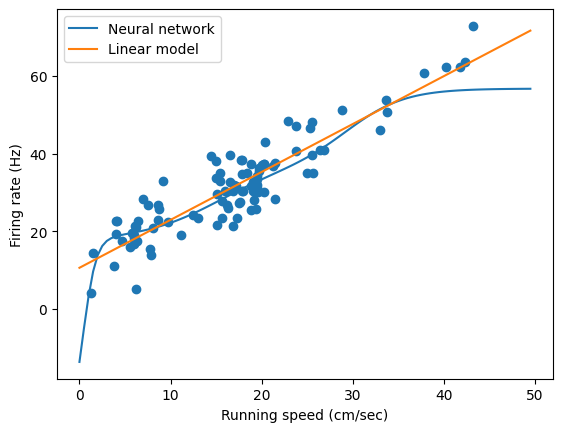

In [58]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

### Neural networks can model all sorts of functions

Let's try our two models on some non-linear problems

In [59]:
X = torch.arange(0,10,0.1).unsqueeze(1)
print(X.shape)
y = torch.sin(X)*4 + torch.randn(100, 1)

torch.Size([100, 1])


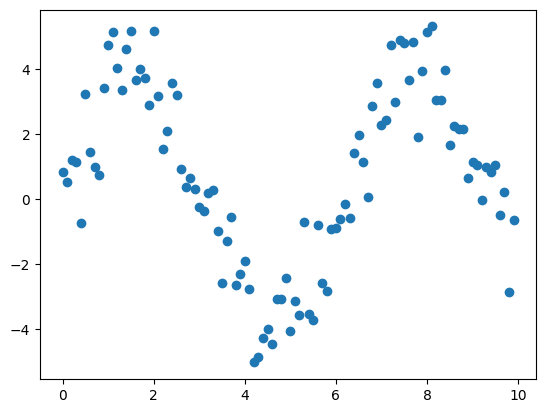

In [60]:
plt.scatter(X.numpy(),y.numpy())

In [61]:
learning_rate=0.001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 30000,
              optimizer = optimizer,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 310.4905090332031
Epoch: 1, Loss: 242.0498046875
Epoch: 2, Loss: 235.16595458984375
Epoch: 3, Loss: 227.3329315185547
Epoch: 4, Loss: 217.0001983642578
Epoch: 5, Loss: 196.7113494873047
Epoch: 6, Loss: 80.30804443359375
Epoch: 7, Loss: 41.94977569580078
Epoch: 8, Loss: 35.284812927246094
Epoch: 9, Loss: 30.244565963745117
Epoch: 1000, Loss: 5.6379170417785645
Epoch: 2000, Loss: 5.460107803344727
Epoch: 3000, Loss: 5.265634059906006
Epoch: 4000, Loss: 5.05178689956665
Epoch: 5000, Loss: 4.809343338012695
Epoch: 6000, Loss: 4.341995716094971
Epoch: 7000, Loss: 3.381661891937256
Epoch: 8000, Loss: 3.0168838500976562
Epoch: 9000, Loss: 2.831467628479004
Epoch: 10000, Loss: 2.7103936672210693
Epoch: 11000, Loss: 2.6275362968444824
Epoch: 12000, Loss: 2.5645182132720947
Epoch: 13000, Loss: 2.505859136581421
Epoch: 14000, Loss: 2.44222354888916
Epoch: 15000, Loss: 2.3709969520568848
Epoch: 16000, Loss: 2.29598331451416
Epoch: 17000, Loss: 2.2240893840789795
Epoch: 18000, Loss:

In [62]:
learning_rate=0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 30000,
              optimizer = optimizer,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 273.49664306640625
Epoch: 1, Loss: 241.74188232421875
Epoch: 2, Loss: 214.10719299316406
Epoch: 3, Loss: 190.0576934814453
Epoch: 4, Loss: 169.12794494628906
Epoch: 5, Loss: 150.91285705566406
Epoch: 6, Loss: 135.05999755859375
Epoch: 7, Loss: 121.26264953613281
Epoch: 8, Loss: 109.25391387939453
Epoch: 9, Loss: 98.8016128540039
Epoch: 1000, Loss: 15.492944717407227
Epoch: 2000, Loss: 10.455926895141602
Epoch: 3000, Loss: 8.589137077331543
Epoch: 4000, Loss: 7.897280693054199
Epoch: 5000, Loss: 7.640869140625
Epoch: 6000, Loss: 7.545839309692383
Epoch: 7000, Loss: 7.510621547698975
Epoch: 8000, Loss: 7.497568130493164
Epoch: 9000, Loss: 7.492730140686035
Epoch: 10000, Loss: 7.490938186645508
Epoch: 11000, Loss: 7.490273475646973
Epoch: 12000, Loss: 7.490026950836182
Epoch: 13000, Loss: 7.489935874938965
Epoch: 14000, Loss: 7.489901542663574
Epoch: 15000, Loss: 7.489889144897461
Epoch: 16000, Loss: 7.489884853363037
Epoch: 17000, Loss: 7.4898834228515625
Epoch: 18000, Lo

In [63]:
t_range = torch.arange(0,10,0.2).unsqueeze(1)
t_range.shape

torch.Size([50, 1])

In [64]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

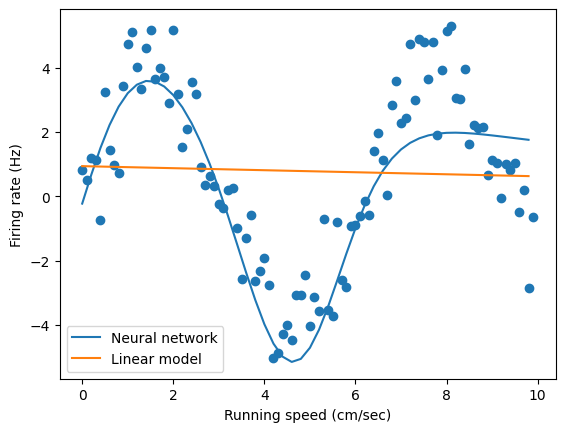

In [65]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

The non-linearity in the artifical neurons makes it possible to fit all sorts of function.

Here, the neural network is a better approximation of the underlying data. 

## Exercise

Our neural network is good but it is not perfect. 

How could you modify this model to make it fit the data more closely?

Have a go at trying to improve its predictions.